## **ASSIGNMENT - WEEK 10**

#### **INSTRUCTIONS**
- When answering a question, indicate the question number and the question before your answer.
- Use comments to explain what your are doing in your code.
- Don't deviate from the questions asked.

**READ THE QUESTIONS CAREFULLY BEFORE ANSWERING**

### **Question 1**
Load the `load_iris` dataset from sklearn datasets, separate it into `features (X)` and `target (y)`

Split your data into `train` and `test` data using a `test size of 20%` and a `random state of 20`.

### **Question 1**


### Load the `load_iris` dataset from sklearn datasets, separate it into `features (X)` and `target (y)`

In [1]:
import sklearn

In [2]:
from sklearn.datasets import load_iris


In [3]:
# Loading the iris dataset
iris = load_iris()

In [4]:
# to view what is inside the iris dataset
print("Feature names (columns):", iris.feature_names)
print("Target names (types of iris flowers):", iris.target_names)

Feature names (columns): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names (types of iris flowers): ['setosa' 'versicolor' 'virginica']


In [5]:
X = iris.data 
y = iris.target
#note; x= input data i.e features while y= labels i.e what kind of flower

In [6]:
X.shape

(150, 4)

In [7]:
y.shape

(150,)

In [8]:
#view first 5 rows of data
print("\nFirst 5 rows of data (features):")
print(X[:5])

print("\nFirst 5 labels:")
print(y[:5])


First 5 rows of data (features):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First 5 labels:
[0 0 0 0 0]


#### Split your data into `train` and `test` data using a `test size of 20%` and a `random state of 20`.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Splitting the data with train_test_split function(using 80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)


In [11]:
# to check the sizes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (120, 4)
Testing features shape: (30, 4)
Training labels shape: (120,)
Testing labels shape: (30,)


In [12]:
# Checking if number of both shape match
print(X_test.shape[0] == y_test.shape[0])


True


## Output from spliting above Means
Training features shape: (120, 4)
i have 120 samples for training, and each sample has 4 features (sepal/petal measurements).

Testing features shape: (30, 4)
i have 30 samples for testing, also with 4 features each.

Training labels shape: (120,)
These are the labels (flower types) for your 120 training samples.

Testing labels shape: (30,)
These are the labels for your 30 test samples.

### **Question 2**
Train a LogisticRegression model on the iris dataset and evaluate the model using these metrics:
- `Accuracy`
- `Precision and recall`
- `Confusion matrix`

**NOTE**: Interpret the metrics values.

Use a new `test size of 10%` and train another model using this test size. Was there any difference in the model performance or not?


### **Question 2**

In [13]:
#importing the libraries for Logistic Regression, accuracy_score, etc

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report



In [14]:
# Training the model

# Create and train Logistic Regression model
model = LogisticRegression(max_iter=200, multi_class ="ovr")

# fitting the model
model.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='ovr')

In [15]:
# Making predictions
y_pred = model.predict(X_test)

In [16]:
# for Accuracy
accuracy = accuracy_score(y_test, y_pred)


In [17]:
# use of Precision and Recall (because it's multi-class hence the use of average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [18]:
# use of Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.85      1.00      0.92        11
   Virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [20]:
# Printing all the results in another way
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9333333333333333
Precision: 0.9487179487179488
Recall: 0.9393939393939394
Confusion Matrix:
 [[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]


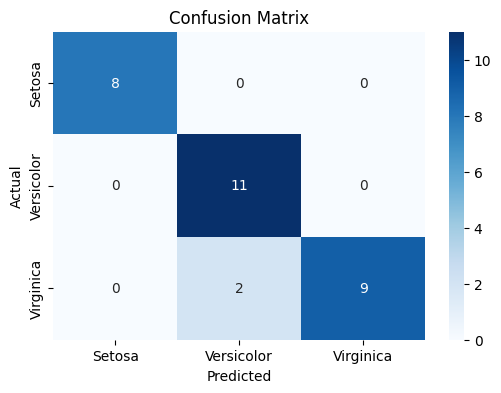

In [21]:
# visualising the confusion matrix to see the predictions
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Actual and predicted values (use your existing y_test and y_pred)
cm = confusion_matrix(y_test, y_pred)

# Class names for the iris dataset
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Create a heatmap (colored table)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### **Question 3**
From the sklearn datasets:
- load the `fetch_california_housing` and separate it into the `features (X)` and `labels (y)`


In [22]:
from sklearn.datasets import fetch_california_housing

In [23]:
# Loading the California housing dataset and renaming it to CH
CH = fetch_california_housing()

In [24]:
# Separating it into features (X) and labels (y)
X = CH.data       
y = CH.target    


In [25]:
# Viewing the shape
print("X shape:", X.shape)  
print("y shape:", y.shape)

X shape: (20640, 8)
y shape: (20640,)


- for the X shape: (20640, 8)
it have 20,640 samples (rows), and each one has 8 features (columns)

- for the y shape: (20640,)
it have 20,640 target values — one for each row in X

### **Question 4**
- Split the `X` and `y` into `train` and `test` datasets (using `random state of 42` and `test size of 30%`) and train a `Linear Regression model` on the train data.

In [26]:
# import Linear Regression from the library
from sklearn.linear_model import LinearRegression

In [27]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [28]:
# Creating and train the Linear Regression model
Lin_model = LinearRegression()
Lin_model.fit(X_train, y_train)

LinearRegression()

### **Question 5**
- Use your model to make predictions on your test dataset and plot a `scatter plot` of the `orignial y` values and the `predicted y` values.  

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Making predictions using the model
y_pred = Lin_model.predict(X_test)


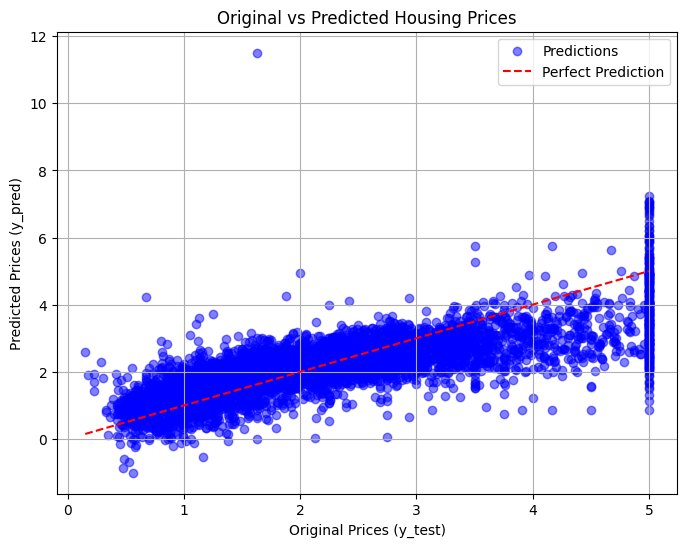

In [31]:
# plot for orignial y values and the predicted y values.
# where y_test is original y and y_pred is the predicted y

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')

# the reference line for perfect prediction
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linestyle='--', label='Perfect Prediction')


# The labels, title, and legend
plt.xlabel("Original Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.title("Original vs Predicted Housing Prices")
plt.legend()
plt.grid(True)
plt.show()